In [1]:
import bacteriopop_utils
import feature_selection_utils
import load_data
import dynamic_mode_decomposition as dmd
import network_construction as net
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
loaded_data = data = load_data.load_data()

In [3]:
loaded_data.shape

(64755, 11)

In [4]:
loaded_data.head()

,kingdom,phylum,class,order,family,genus,length,oxygen,replicate,week,abundance
sampleID,,,,,,,,,,,
1056013,Bacteria,Proteobacteria,Gammaproteobacteria,Methylococcales,Methylococcaceae,Methylobacter,9948861,Low,1,4,0.228531
1056013,Bacteria,Proteobacteria,Betaproteobacteria,Methylophilales,Methylophilaceae,Methylotenera,5066955,Low,1,4,0.220860
1056013,Bacteria,Bacteroidetes,Flavobacteriia,Flavobacteriales,Flavobacteriaceae,Flavobacterium,4654774,Low,1,4,0.054719
1056013,Bacteria,Proteobacteria,Gammaproteobacteria,Methylococcales,Methylococcaceae,,3046340,Low,1,4,0.047956
1056013,Bacteria,Proteobacteria,Gammaproteobacteria,,,,5620690,Low,1,4,0.040903


## Demo extraction of categorical featues to binary columns:

In [5]:
extracted_features = bacteriopop_utils.extract_features(
    dataframe = loaded_data,
    column_list = ['kingdom', 'phylum', 'class', 'order', 'family', 'genus', 'oxygen', 'abundance']
    # default list was: ['kingdom', 'phylum', 'class', 'order', 'family', 'genus', 'length', 'abundance', 'project']
    )

In [6]:
extracted_features.head()

,abundance,class=,class=Acidobacteriia,class=Actinobacteria,class=Alphaproteobacteria,class=Anaerolineae,class=Aquificae,class=Archaeoglobi,class=Bacilli,class=Bacteroidia,...,phylum=Planctomycetes,phylum=Poribacteria,phylum=Proteobacteria,phylum=Spirochaetes,phylum=Synergistetes,phylum=Tenericutes,phylum=Thaumarchaeota,phylum=Thermodesulfobacteria,phylum=Thermotogae,phylum=Verrucomicrobia
0,0.228531,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0.220860,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0.054719,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.047956,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0.040903,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [7]:
extracted_features.shape

(64755, 1450)

## Just do PCA on a tiny bit of the data as a demo

In [8]:
pca_results = feature_selection_utils.pca_bacteria(
    data = extracted_features.head(100), n_components = 10)

In [9]:
pca_results.components_

array([[-0.00272314, -0.03975207, -0.00449753, ...,  0.        ,
         0.        ,  0.        ],
       [-0.00259397,  0.19156772,  0.01794534, ...,  0.        ,
         0.        ,  0.        ],
       [-0.00975221, -0.07112615,  0.00182794, ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [ 0.02491242, -0.00092397,  0.00278457, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.00165731, -0.10002272,  0.03476809, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.00781743,  0.30522996, -0.02791468, ...,  0.        ,
         0.        ,  0.        ]])

Do correlations for a tiny subset of the data.

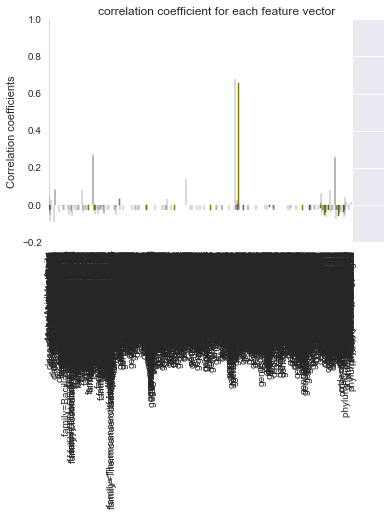

[1.0,
 0.05712255379759805,
 -0.027142703312487231,
 -0.051814815473068342,
 -0.084902856481758493,
 nan,
 nan,
 nan,
 -0.027244216677764683,
 nan,
 0.026510345994575166,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 -0.092416636286092216,
 nan,
 nan,
 nan,
 0.084502315899734545,
 nan,
 0.087133017969123955,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 -0.03880740443904402,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 -0.0024052351073851441,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 -0.027142703312487231,
 nan,
 nan,
 nan,
 nan,
 -0.027610089966615979,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 -0.026377266058169365,
 nan,
 nan,
 -0.05004869648853312,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 -0.037698514516767999,
 nan,
 -0.027348151171924347,
 nan,
 nan,
 -0.055793184905792437,
 nan,
 nan,
 nan,
 nan,
 nan

In [10]:
feature_selection_utils.calculate_features_target_correlation(
    data = extracted_features.head(100),
    features = extracted_features.columns.tolist(),
    target='abundance',
    method="Pearson")

# Find the interaction network among bactria

In [11]:
mappings, nodes_list = dmd.find_fixed_adjacency_matrix(0,'order',False)

all groups of oxygen/week/replicate have abundances that sum to 1
columns after aggregating on phylo level: Index([u'oxygen', u'replicate', u'week', u'kingdom', u'phylum', u'class',
       u'order', u'abundance'],
      dtype='object')


# Grpahs Visualization

In [12]:
for key in mappings.keys():
    Adj = mappings[key]
    nodes = nodes_list[key]
#     g = net.create_one_graph(Adj,nodes,edge_treshhold=1e-10)

## Make, reduce, and Panda-ify the Adjacency matrix for each series: 

Note that "mappings" is called "linear mappings" in the code. 

In [13]:
#Calculation parameters:
p = 1  # percent abundance to consider significant. 
adjacency_magnitude = 1.5 # signal to trim by before plotting

In [14]:
# Only look for bacteria who are p% of the population in at least 1 sample. 
mappings, nodes = dmd.find_fixed_adjacency_matrix(p/100,'order',True)

all groups of oxygen/week/replicate have abundances that sum to 1
columns after aggregating on phylo level: Index([u'oxygen', u'replicate', u'week', u'kingdom', u'phylum', u'class',
       u'order', u'abundance'],
      dtype='object')


In [15]:
# Only pull out species that have interactions with another member with magnitude greater than 0.5

mappings, nodes = net.reduce_all_adjacency_matrixes_in_dict(mappings, nodes, 
                                                            adjacency_magnitude)

network_construction.py:106: ComplexWarning: Casting complex values to real discards the imaginary part
  new_adj[i][j] = adj[node1][node2]


In [16]:
# Convert all of the dataframes to Pandas
mappings = dmd.DMD_results_dict_from_numpy_to_pandas(mappings,nodes)

# aggregate_adjacency_matrix_over_replicates is depreciated!
# std_mappings, avg_mappings, snr_mappings = dmd.aggregate_adjacency_matrix_over_replicates(mappings)

### Loop over the individual series and plot.

In [17]:
mappings.keys()

[('High', 4),
 ('Low', 1),
 ('High', 3),
 ('Low', 2),
 ('High', 2),
 ('Low', 3),
 ('High', 1),
 ('Low', 4)]

?? Make this display inlne since it is a demo? 

In [18]:
net.plot_all_adjacency_heatmaps(mappings)

## Aggregate the matrices for the 4 high-oxygen samples, then the 4 low-oxygen samples

In [19]:
# TO DO!